In [61]:
import sys
sys.path.append('/home/flint/diplom/experiments')

In [62]:
!pwd
!ls /home/flint/diplom/experiments/_dataset

/home/flint/diplom/experiments/other_experiments/classifier
15_lstm_ir2vec_instcount_autophase_mca_insts_bigger_model_161.npz
best_model_insts-229-232.npz
best_model_insts-229.npz
best_model_mca-228.npz
best_model_runtime-230.npz
dataset.npz
dummy-1zd1qkfp.npz
dummy-27ym4g2x.npz
dummy-5hq36a52.npz
dummy-dfg4u2y1.npz


In [63]:
import numpy as np

In [64]:
# MODEL_NAME = "best_model_insts-229"
MODEL_NAME = "15_lstm_ir2vec_instcount_autophase_mca_insts_bigger_model_161"

In [65]:
from dataset import Dataset

dataset = Dataset.from_path(f"/home/flint/diplom/experiments/_dataset/{MODEL_NAME}.npz")
# dataset = Dataset.from_path(f"/home/flint/diplom/experiments/_dataset/{MODEL_NAME}.npz")

In [66]:
# dataset._x = dataset._x[:, 3:-1]
dataset._x = dataset._x[:, 303:-1]

In [67]:
dataset._x.shape

(1101, 125)

In [68]:
dataset._x[0, :5]

array([0.13793103, 0.12643678, 0.06896552, 0.05747126, 0.01149425])

In [69]:
dataset._y.shape

(1101, 4)

In [70]:
from collections import Counter

Counter(dataset._y[:, ::-1].argmax(axis=1))

Counter({3: 579, 1: 436, 0: 86})

In [71]:
# sum(dataset._y[:, 1] < dataset._y[:, 2])

In [84]:
X = dataset._x
y = dataset._y[:, 2] - dataset._y[:, 3] > dataset._y[:, 0] * 0.0003
# y = dataset._y[:, 2] < dataset._y[:, 3]

In [85]:
y.mean()

0.31970935513169846

In [86]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
y_train.mean()

0.3261363636363636

In [88]:
y_test.mean()

0.29411764705882354

In [89]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler = scaler.fit(X_train)

In [90]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

# clf = LogisticRegression(random_state=0).fit(X_train, y_train)
clf = MLPClassifier(hidden_layer_sizes=(100, 100), random_state=1, 
                    max_iter=500
                   ).fit(X_train, y_train)

In [92]:
clf.score(X_train, y_train)

0.9897727272727272

In [93]:
clf.score(X_test, y_test)

0.9230769230769231

In [94]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score

In [95]:
X_test.shape

(221, 125)

In [96]:
y_pred = clf.predict_proba(X_test)
# y_pred = clf.predict(X_test)
y_pred = y_pred[:, 1] > 0.1

In [97]:
y_pred

array([ True,  True,  True,  True,  True, False, False,  True, False,
       False,  True, False, False,  True, False,  True, False, False,
       False, False,  True,  True,  True, False, False, False,  True,
       False,  True, False, False,  True, False, False, False, False,
       False,  True, False, False, False, False, False,  True,  True,
       False, False, False, False,  True,  True, False, False, False,
        True, False, False, False, False, False, False, False,  True,
       False,  True, False, False,  True,  True,  True, False, False,
       False, False, False, False,  True,  True, False,  True, False,
       False, False, False,  True, False,  True,  True, False,  True,
       False, False, False, False, False, False, False, False,  True,
       False, False, False,  True,  True,  True, False, False, False,
       False,  True,  True,  True, False, False, False,  True, False,
       False, False, False,  True,  True, False,  True,  True, False,
       False,  True,

In [98]:
sum(y_pred)

73

In [99]:
precision_score(y_test, y_pred)

0.8356164383561644

In [100]:
recall_score(y_test, y_pred)

0.9384615384615385

In [101]:
accuracy_score(y_test, y_pred)

0.9276018099547512

In [102]:
roc_auc_score(y_test, y_pred)

0.9307692307692309

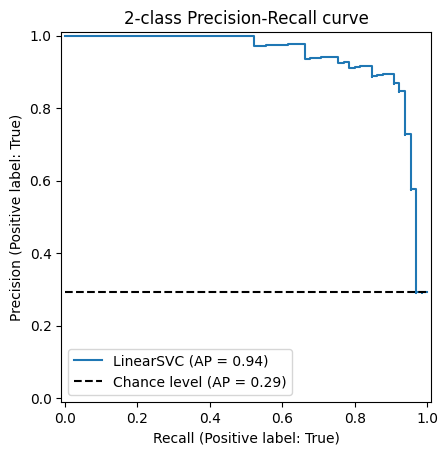

In [103]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    clf, X_test, y_test, name="LinearSVC", plot_chance_level=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [104]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, clf.predict_proba(X_test)[:, 1])

In [105]:
roc_auc = metrics.auc(fpr, tpr)

In [106]:
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='example estimator')

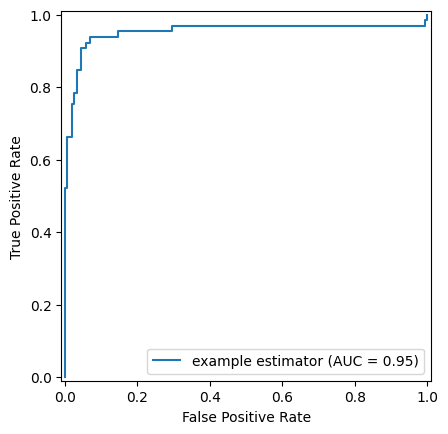

In [107]:
display.plot()

Area Under the ROC Curve for threshold 0.5: 0.9523668639053254
Area Under the ROC Curve for threshold 0.08: 0.9294871794871795


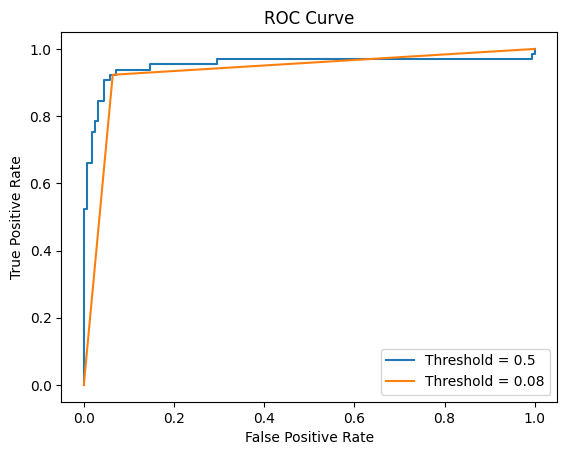

In [108]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

y_scores = clf.predict_proba(X_test)[:, 1] 
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_scores) 
plt.plot(fpr, tpr,  label = 'Threshold = 0.5') 
print('Area Under the ROC Curve for threshold 0.5:', roc_auc_score(y_test, y_scores)) 
  
# For Threshold 0.9 
y_pred_new_threshold = clf.predict_proba(X_test)[:, 1] >= 0.15
fpr_, tpr_, thresholds_ = metrics.roc_curve(y_test, y_pred_new_threshold) 
print('Area Under the ROC Curve for threshold 0.08:', roc_auc_score(y_test, y_pred_new_threshold)) 
plt.plot(fpr_, tpr_, label = 'Threshold = 0.08')

plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('ROC Curve') 
plt.legend() 
plt.show()

In [109]:
import argparse
import dataclasses
import os
from subprocess import TimeoutExpired
import random

import compiler_gym
import gym
import numpy as np
import pandas as pd
import torch
from compiler_gym import CompilerEnv
from scipy import stats
from tabulate import tabulate
from tqdm import tqdm

from config.config import TrainConfig
from env.performance_optimization.llvm import compile_lm_safely
from runtime_eval.hyperfine_utils import save_whisker_plot
from runtime_eval.jotai.eval import measure_execution_mean_and_std
from utils import (
    get_agent,
    get_model_path,
    optimize_with_model,
    get_observation_from_cg,
)
from observation.utils import ObservationModifier

In [110]:
config = TrainConfig.load_config_from_path(f"/home/flint/diplom/experiments/_models/trash2/{MODEL_NAME}_config.json")
env: CompilerEnv = gym.make("llvm-v0")
benchmarks = list(env.datasets["benchmark://cbench-v1"].benchmarks())
skipped_benchmarks = {"bzip2", "adpcm", "ghostscript", "ispell", "lame", "rijndael"}

In [111]:
good = {
    "bitcount",
    "jpeg-c",
    "patricia",
    "stringsearch2",
    "susan",
    "tiff2rgba",
    "tiffdither",
}
good_probs = []
bad_probs = []

In [112]:
for benchmark in tqdm(benchmarks):
    benchmark_name = str(benchmark).rsplit("/", maxsplit=1)[-1]
    observation_modifier = ObservationModifier(None, config.observation_modifiers, config.episode_length)
    if benchmark_name in skipped_benchmarks:
        continue
    with compiler_gym.make("llvm-v0", benchmark=benchmark) as new_env:
        new_env.reset()
        # if not new_env.observation["IsRunnable"]:
        #     print(f"Benchmark {benchmark} not runnable, skip it")
        #     continue
        base_observation = get_observation_from_cg(new_env, config.observation_space)
        obs = observation_modifier.modify(
            base_observation, config.episode_length, ir=new_env.observation["Ir"]
        )
        # obs = scaler.transform([obs[3:-1]])[0]
        obs = scaler.transform([obs[303:-1]])[0]
        proba = clf.predict_proba([obs])
        if benchmark_name in good:
            good_probs.append(proba[0])
        else:
            bad_probs.append(proba[0])
        pred = clf.predict([obs])
        print(f"{benchmark_name}: {proba} - {pred}")

  9%|███▊                                        | 2/23 [00:00<00:09,  2.17it/s]

bitcount: [[9.99999965e-01 3.53403224e-08]] - [False]


 13%|█████▋                                      | 3/23 [00:02<00:21,  1.07s/it]

blowfish: [[1.00000000e+00 4.72423332e-28]] - [False]


 22%|█████████▌                                  | 5/23 [00:03<00:11,  1.52it/s]

crc32: [[1.00000000e+00 2.12106283e-12]] - [False]


 26%|███████████▍                                | 6/23 [00:04<00:11,  1.49it/s]

dijkstra: [[1.0000000e+00 1.4871864e-12]] - [False]


 35%|███████████████▎                            | 8/23 [00:10<00:27,  1.87s/it]

gsm: [[1.00000000e+00 5.68027376e-16]] - [False]


 43%|██████████████████▋                        | 10/23 [00:39<01:25,  6.61s/it]

jpeg-c: [[9.99839125e-01 1.60874584e-04]] - [False]


 48%|████████████████████▌                      | 11/23 [01:07<02:16, 11.35s/it]

jpeg-d: [[9.99813940e-01 1.86059701e-04]] - [False]


 57%|████████████████████████▎                  | 13/23 [01:08<01:11,  7.18s/it]

patricia: [[1.00000000e+00 4.03919285e-12]] - [False]


 61%|██████████████████████████▏                | 14/23 [01:09<00:52,  5.82s/it]

qsort: [[1.00000000e+00 6.15687201e-18]] - [False]


 70%|█████████████████████████████▉             | 16/23 [01:10<00:26,  3.79s/it]

sha: [[1.00000000e+00 3.27564596e-12]] - [False]


 74%|███████████████████████████████▊           | 17/23 [01:11<00:19,  3.22s/it]

stringsearch: [[1.00000000e+00 4.55789914e-18]] - [False]


 78%|█████████████████████████████████▋         | 18/23 [01:12<00:13,  2.63s/it]

stringsearch2: [[1.00000000e+00 2.39568868e-21]] - [False]


 83%|███████████████████████████████████▌       | 19/23 [01:19<00:15,  3.78s/it]

susan: [[9.99999974e-01 2.64443408e-08]] - [False]


 87%|█████████████████████████████████████▍     | 20/23 [01:46<00:30, 10.02s/it]

tiff2bw: [[9.99999960e-01 3.99915327e-08]] - [False]


 91%|███████████████████████████████████████▎   | 21/23 [02:16<00:30, 15.43s/it]

tiff2rgba: [[9.99999971e-01 2.87865489e-08]] - [False]


 96%|█████████████████████████████████████████▏ | 22/23 [02:48<00:20, 20.07s/it]

tiffdither: [[9.99999974e-01 2.62429927e-08]] - [False]


100%|███████████████████████████████████████████| 23/23 [03:33<00:00,  9.28s/it]

tiffmedian: [[9.99999942e-01 5.78868870e-08]] - [False]


In [113]:
good_probs

[array([9.99999965e-01, 3.53403224e-08]),
 array([9.99839125e-01, 1.60874584e-04]),
 array([1.00000000e+00, 4.03919285e-12]),
 array([1.00000000e+00, 2.39568868e-21]),
 array([9.99999974e-01, 2.64443408e-08]),
 array([9.99999971e-01, 2.87865489e-08]),
 array([9.99999974e-01, 2.62429927e-08])]

In [114]:
bad_probs

[array([1.00000000e+00, 4.72423332e-28]),
 array([1.00000000e+00, 2.12106283e-12]),
 array([1.0000000e+00, 1.4871864e-12]),
 array([1.00000000e+00, 5.68027376e-16]),
 array([9.99813940e-01, 1.86059701e-04]),
 array([1.00000000e+00, 6.15687201e-18]),
 array([1.00000000e+00, 3.27564596e-12]),
 array([1.00000000e+00, 4.55789914e-18]),
 array([9.99999960e-01, 3.99915327e-08]),
 array([9.99999942e-01, 5.78868870e-08])]